# HW7 (total points 6)

# Use pandas API to finish problem in this notebook.
Total points 6

In [1]:
import numpy as np
import pandas as pd

In [3]:
from io import BytesIO
from zipfile import ZipFile
!pip install requests
import requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 KB 1.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.2/149.2 KB 2.9 MB/s eta 0:00:00a 0:00:01


**Let download movie lense dataset [MovieLens](https://grouplens.org/datasets/movielens/) and extract zip file using various python packages**

http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [4]:
r = requests.get("http://files.grouplens.org/datasets/movielens/ml-latest-small.zip")
print(r.status_code)
zipfile = ZipFile(BytesIO(r.content))

200


In [5]:
zipfile.extractall()

In [6]:
! ls ml-latest-small/

README.txt  links.csv  movies.csv  ratings.csv	tags.csv


In [7]:
! head  ./ml-latest-small/movies.csv

**It is a csv file.** We can use pandas read_csv to read this file into pandas DataFrame

In [8]:
# lets read movies.csv file
movie = pd.read_csv('./ml-latest-small/movies.csv')

movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Q1 (.25 point) Check if any columns is null

In [9]:
# write pandas code here
movie.isnull().values.any()

False

# Q 2 (.25 point) Check datatype of columns

In [10]:
# write pandas code here
movie.dtypes

movieId     int64
title      object
genres     object
dtype: object

# Q3 (.5 point) Using *str* on  series genres, build following  unique_genere set. It should contain all the unique genres from genres column. Print unique genres too.



In [13]:
# write pandas code here
unique_genre = set(movie.genres.str.split("|").sum())
unique_genre.remove('(no genres listed)')
print(unique_genre)

{'Comedy', 'Animation', 'War', 'Romance', 'Documentary', 'Crime', 'Film-Noir', 'Adventure', 'Children', 'Fantasy', 'Mystery', 'Sci-Fi', 'IMAX', 'Action', 'Horror', 'Western', 'Thriller', 'Musical', 'Drama'}


# Q 4 (1 point) build columns for different genres with value True or False based on whether a  genre is present or not in an observation?



In [14]:
# write pandas code here

for genre in unique_genre:
    movie[genre] = movie.genres.map(lambda x: genre in x.split("|"))
movie.sample(10)

,movieId,title,genres,Comedy,Animation,War,Romance,Documentary,Crime,Film-Noir,...,Fantasy,Mystery,Sci-Fi,IMAX,Action,Horror,Western,Thriller,Musical,Drama
6164,44511,Unknown White Male (2005),Documentary,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3021,4040,Don't Tell Mom the Babysitter's Dead (1991),Comedy,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8209,103539,The Spectacular Now (2013),Comedy|Drama|Romance,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3712,5121,Stroszek (1977),Comedy|Drama,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2590,3462,Modern Times (1936),Comedy|Drama|Romance,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4883,7316,Confessions of a Teenage Drama Queen (2004),Comedy,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4809,7164,Peter Pan (2003),Action|Adventure|Children|Fantasy,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
3250,4393,Another Woman (1988),Drama,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8383,109687,Particle Fever (2013),Documentary,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5864,32799,Maidens in Uniform (Mädchen in Uniform) (1931),Drama|Romance,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


# Q5(1 point) Build year column in movie data frame. Year are embedded in title columns




Python regular expression  package **re** is very useful tool for text data handling.  This excercise is a very primitive use of it.


note
- . mean any character
- *. means "0 or more instances of the preceding regex token
- \[ matches a literal [ character
- [A-Za-z0-9] digits and lower, upper case, I think same as \w+
- '+' matches one more more times
- \d Matches any decimal digit

In [15]:
# write pandas code here

import re
movie['year'] = movie['title'].str.extract(r'([(]\d{4}[)]|[(]\d{4}\S+[)])')
movie['year'] = movie['year'].apply(lambda x: re.sub(r'\[()]','',str(x)))
movie['year'] = np.where(movie['year'] == 'nan', None, movie['year'])
movie.head()

,movieId,title,genres,Comedy,Animation,War,Romance,Documentary,Crime,Film-Noir,...,Mystery,Sci-Fi,IMAX,Action,Horror,Western,Thriller,Musical,Drama,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,(1995)
1,2,Jumanji (1995),Adventure|Children|Fantasy,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,(1995)
2,3,Grumpier Old Men (1995),Comedy|Romance,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,(1995)
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,(1995)
4,5,Father of the Bride Part II (1995),Comedy,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,(1995)


# Q6.(.5 point) Using seaborn, plot a bar plot of average number of movies per year. Do you see any trend?

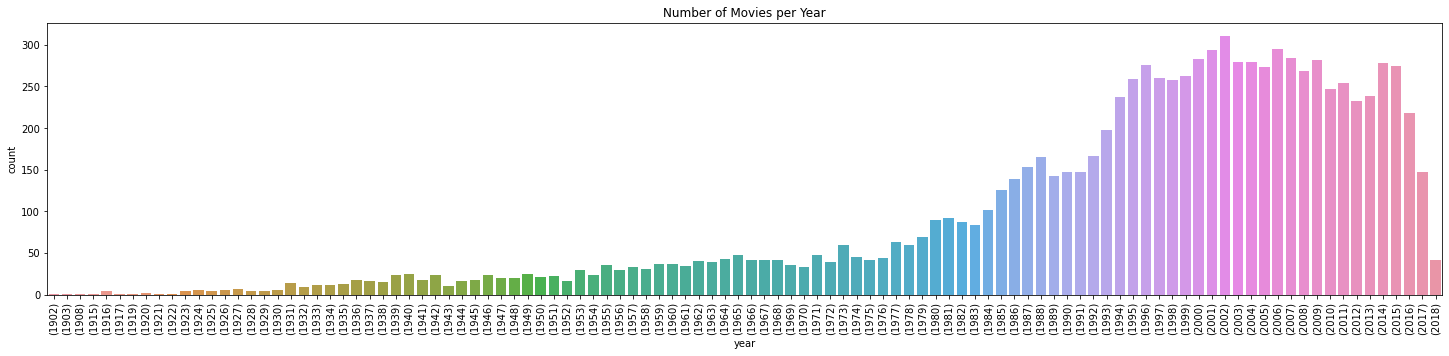

In [16]:
# write code here.
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

year = movie['year'].sort_values().tolist()
years = set()
for y in year:
    if y is not None and len(y) < 8:
        years.add(y)

plt.figure(figsize = (25,5))
ax = sns.countplot(x = 'year', data = movie, order = list(sorted(years))).set(title = 'Number of Movies per Year')
plt.xticks(rotation = 90)
plt.show()

# Q7.(1 point) Using matplotlib, plot total number of movies in different genres over the year. Plot should have proper title, axis labels and legends.

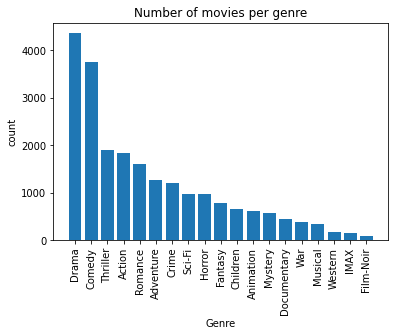

In [17]:
movie_genres = pd.melt(movie, value_vars = list(unique_genre), var_name = 'Genre')
movie_genres = movie_genres[movie_genres['value']]
plt.bar(movie_genres['Genre'].value_counts().index.tolist(), movie_genres['Genre'].value_counts())
plt.xlabel('Genre')
plt.ylabel('count')
plt.xticks(rotation = 'vertical')
plt.title('Number of movies per genre')
plt.show()

# Q 8 (.5 point) Build a *movie_title* column containing  the title of the movie(It should not contain year). Drop the original *title* columns. Display final movie dataFrame too.

In [18]:
 # write pandas code here

movie['movie_title'] = movie['title'].apply(lambda x: re.sub(r'([(]\d{4}[)]|[(]\d{4}\S+[)])','', x))
movie.drop('title', inplace = True, axis = 1)
movie
    

,movieId,genres,Comedy,Animation,War,Romance,Documentary,Crime,Film-Noir,Adventure,...,Sci-Fi,IMAX,Action,Horror,Western,Thriller,Musical,Drama,year,movie_title
0,1,Adventure|Animation|Children|Comedy|Fantasy,True,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,(1995),Toy Story
1,2,Adventure|Children|Fantasy,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,(1995),Jumanji
2,3,Comedy|Romance,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,(1995),Grumpier Old Men
3,4,Comedy|Drama|Romance,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,(1995),Waiting to Exhale
4,5,Comedy,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,(1995),Father of the Bride Part II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Action|Animation|Comedy|Fantasy,True,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,(2017),Black Butler: Book of the Atlantic
9738,193583,Animation|Comedy|Fantasy,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,(2017),No Game No Life: Zero
9739,193585,Drama,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,(2017),Flint
9740,193587,Action|Animation,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,(2018),Bungo Stray Dogs: Dead Apple


# Q 9(1 point) Using seaborn, plot average number of words in a movie name over the year in different genres. Write your observation in no more than 2 lines.

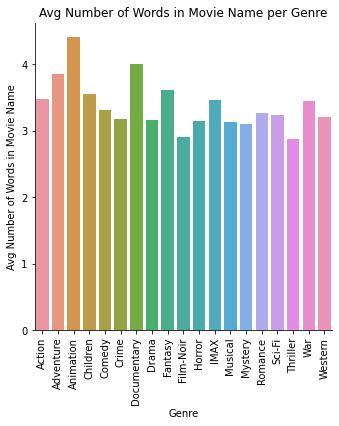

In [23]:
# Write code here.

movie_titles = pd.melt(movie, id_vars = 'movie_title', value_vars = list(unique_genre), var_name = 'Genre')
movie_titles['title_lengths'] = movie_titles['movie_title'].apply(lambda x: len(x.strip().split(' ')))
movie_titles = movie_titles[movie_titles['value']]
sns.catplot(x = 'Genre', y = 'title_lengths', data = movie_titles.groupby('Genre', as_index = False)['title_lengths'].mean(), kind = 'bar')
plt.xlabel('Genre')
plt.ylabel('Avg Number of Words in Movie Name')
plt.xticks(rotation = 'vertical')
plt.title('Avg Number of Words in Movie Name per Genre')
plt.show()